In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import MDAnalysis as mda
from tqdm import tqdm
from numpy import linalg as LA
from MDAnalysis.analysis import align
from matplotlib.ticker import FuncFormatter

%run ~/.mpl_set.py

In [2]:
dist_df = pd.read_pickle("../../nsp10_16_dist.pkl")
dist_df

,sys_name,frame,V_LJ,V_coul
0,comp_000,0,-89.853116,-112.977772
1,comp_000,1,-94.345539,-119.004136
2,comp_000,2,-97.420490,-119.020865
3,comp_000,3,-91.936986,-116.790218
4,comp_000,4,-96.096351,-117.242889
...,...,...,...,...
359995,comp_sfg_030,3995,-82.875850,-85.565936
359996,comp_sfg_030,3996,-91.498859,-93.447185
359997,comp_sfg_030,3997,-89.320960,-108.358006
359998,comp_sfg_030,3998,-83.177361,-119.736167


In [3]:
energy_df['V_LJ'].

4.867742550906695

In [3]:
min_max = []
for ind, row in dist_df.iterrows(): 
    dist = row['dist']
    min_max += [[min(dist), max(dist)]]

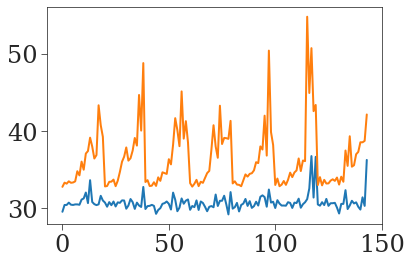

In [4]:
plt.plot(min_max)

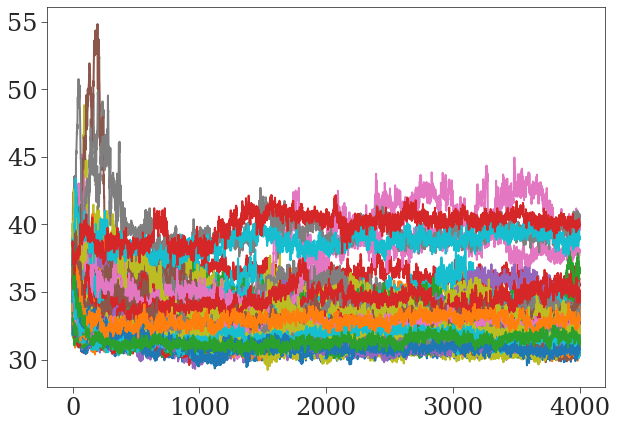

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
min_max = []
for ind, row in dist_df.iterrows(): 
    dist = row['dist']

    plt.plot(dist[:4000], label=row['sys_name'])
# plt.

Text(0.5, 1.0, 'Nsp10-Nsp16')

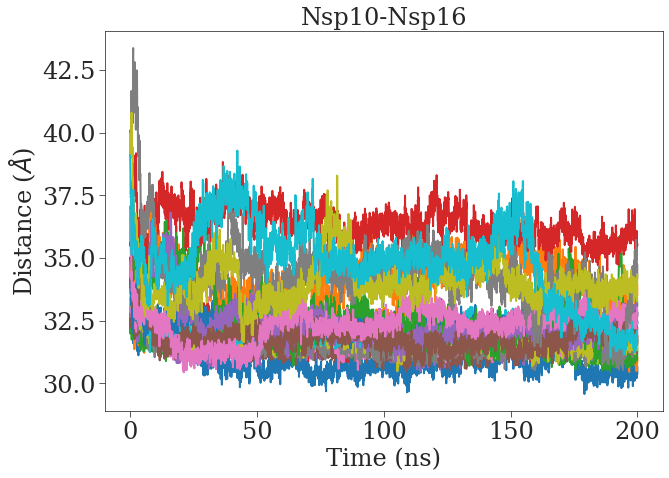

In [6]:
sys_dir = './nsp10_16_dist'
local_df = dist_df[dist_df['run'] == sys_dir]

fig, ax = plt.subplots(figsize=(10,7))
min_max = []
for ind, row in local_df.iterrows(): 
    dist = row['dist']
    ax.plot(np.arange(4000)/20, dist[:4000], label=row['sys_name'])    
# ax.legend() 
ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"Distance ($\AA$)")
ax.set_title("Nsp10-Nsp16")

Text(0.5, 1.0, 'Nsp10-Nsp16')

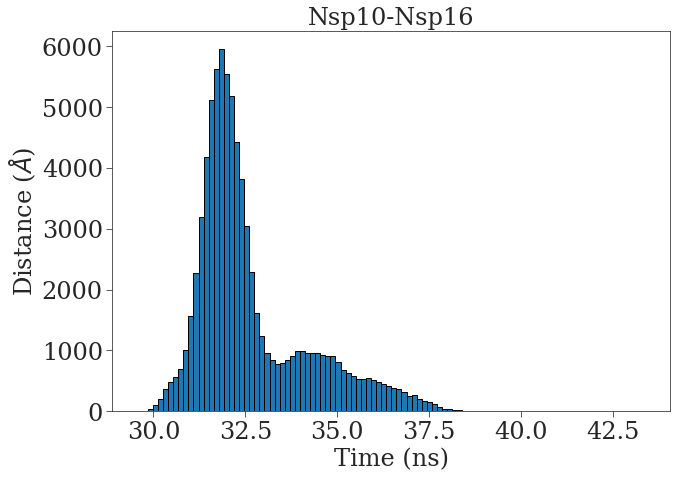

In [7]:
sys_dir = './nsp10_16_dist'
local_df = dist_df[dist_df['run'] == sys_dir]

fig, ax = plt.subplots(figsize=(10,7))
dist_collect = []
for ind, row in local_df.iterrows(): 
    dist_collect += row['dist']

ax.hist(dist_collect, bins=100)    
# ax.legend() 
ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"Distance ($\AA$)")
ax.set_title("Nsp10-Nsp16")

In [15]:
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                     print(val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

In [16]:
def plot_dist(local_df, sys_name): 
    fig, ax = plt.subplots(figsize=(10,7))
    for ind, row in local_df.iterrows(): 
        dist = row['dist']
        ax.plot(np.arange(4000)/20, dist[:4000], label=row['sys_name'])    
    # ax.legend() 
    ax.set_xlabel("Time (ns)")
    ax.set_ylabel(r"Distance ($\AA$)")
    ax.set_title(sys_name)
    fig.savefig(f"{sys_name}.png", bbox_inches='tight')
    

def plot_hist(local_df, sys_name):
    fig, ax = plt.subplots(figsize=(10,7))
    dist_collect = []
    for ind, row in local_df.iterrows(): 
        dist_collect += row['dist']

    ax.hist(dist_collect, bins=100)    
    # ax.legend() 
    ax.set_ylabel("Histogram")
    ax.set_xlabel(r"Distance ($\AA$)")
    ax.set_title(sys_name)
    ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
    fig.savefig(f"{sys_name}_hist.png", bbox_inches='tight')

In [54]:
dist_collect = []
for ind, row in dist_df.iterrows(): 
    dist_collect += row['dist']

np.save('dist.npy', dist_collect)

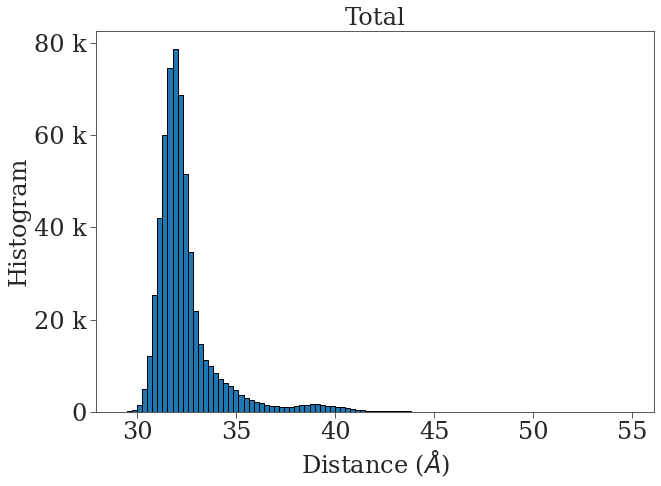

In [17]:
plot_hist(dist_df, "Total")

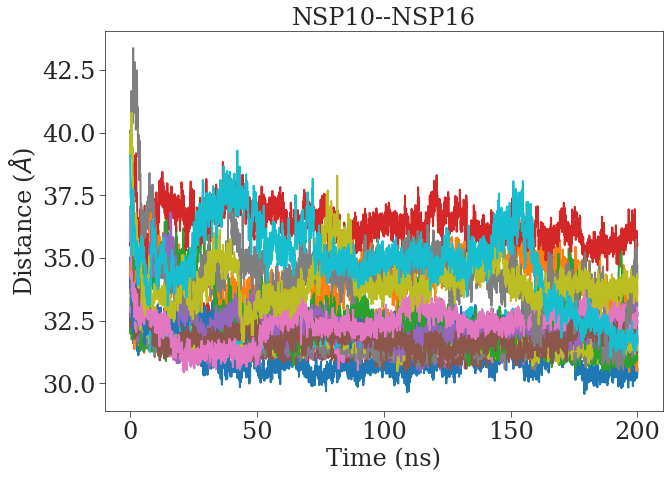

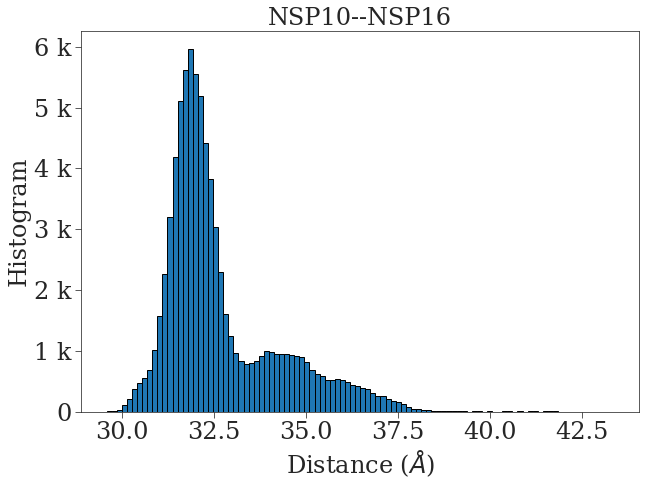

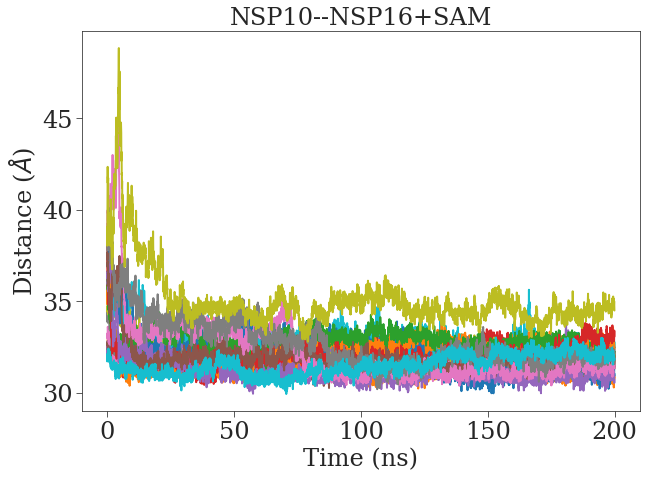

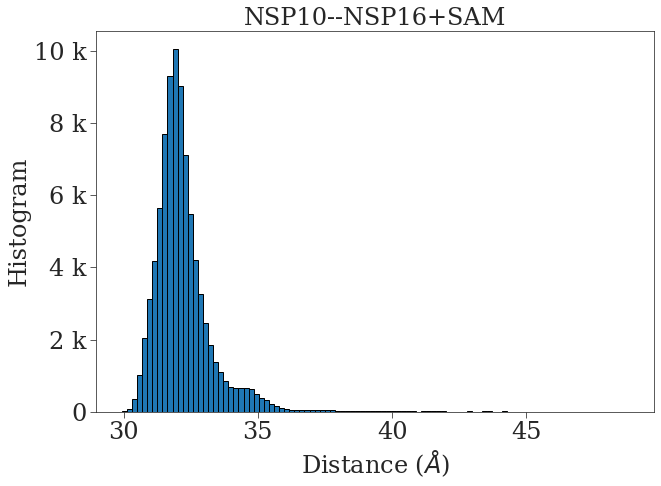

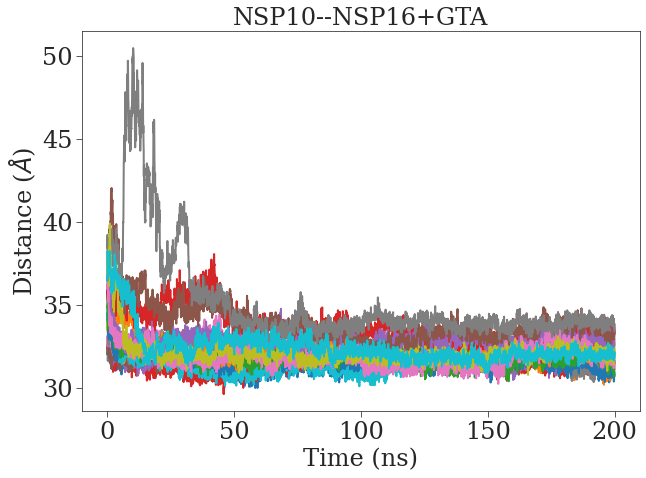

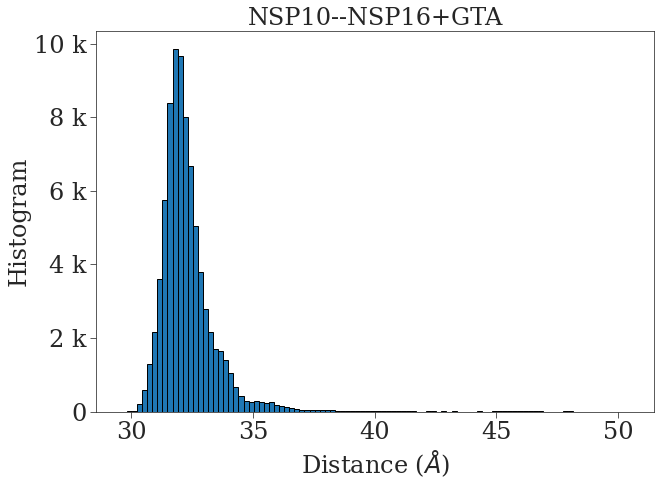

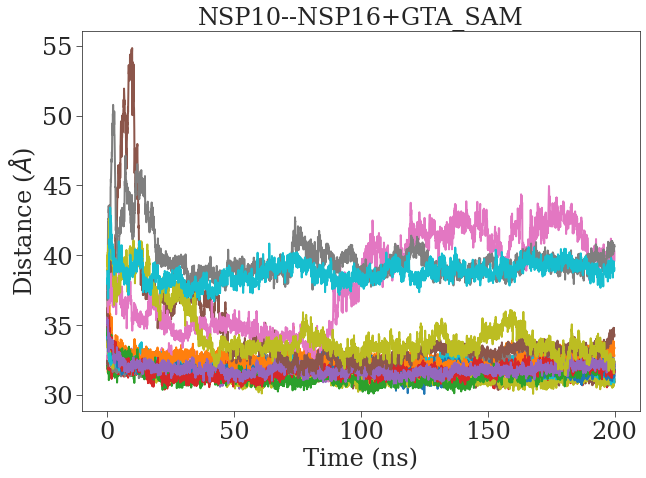

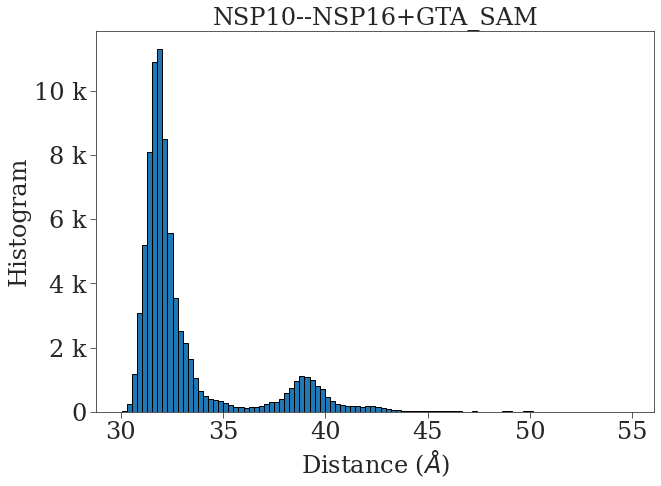

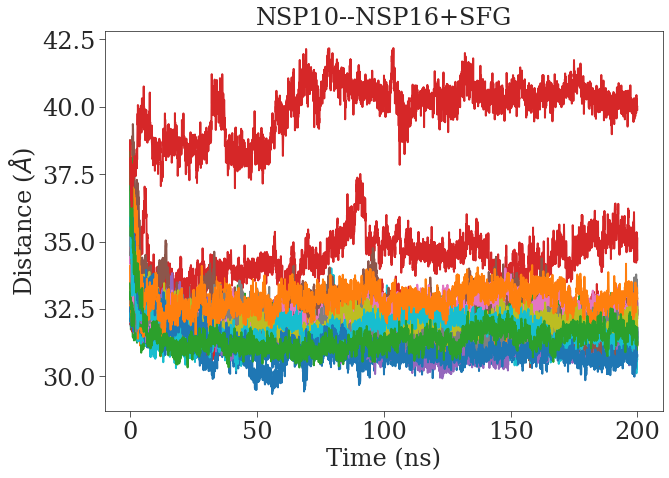

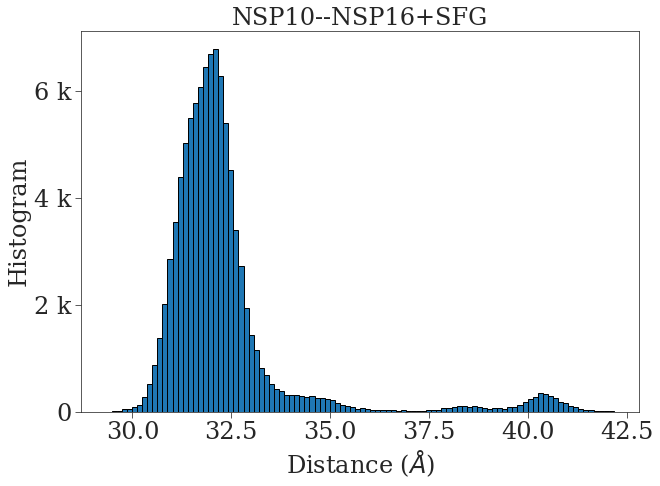

In [48]:
runs = glob.glob('../../nsp10_16_*')

for run in runs: 
    if not os.path.isdir(run): 
        continue 
    run_dir = run[4:]
    local_df = dist_df[dist_df['run'] == run_dir]
    if 'both' in run: 
        continue
    elif 'gta' in run: 
        gta_df = local_df[~local_df['sys_name'].str.contains('samgta')]
        samgta_df = local_df[local_df['sys_name'].str.contains('samgta')]
        sys_name = run_dir[2:].replace('_dist', '')
        sys_name = sys_name.replace("_16", "--NSP16").replace('16_', '16+').upper()
        plot_dist(gta_df, sys_name)
        plot_hist(gta_df, sys_name)
        sys_name = sys_name + '_SAM'
        plot_dist(samgta_df, sys_name)
        plot_hist(samgta_df, sys_name)
    else: 
        sys_name = run_dir[2:].replace('_dist', '')
        sys_name = sys_name.replace("_16", "--NSP16").replace('16_', '16+').upper()
        plot_dist(local_df, sys_name)
        plot_hist(local_df, sys_name)


In [20]:
def collect_dist(local_df):
    dist_collect = []
    for ind, row in local_df.iterrows(): 
        dist_collect += row['dist']

    return dist_collect

In [47]:
runs = glob.glob('../../nsp10_16_*')

dists = []
for run in runs: 
    if not os.path.isdir(run): 
        continue 
    
    if 'both' in run: 
        continue
    else: 
        run_dir = run[4:]
        local_df = dist_df[dist_df['run'] == run_dir]
        if 'gta' in run: 
            gta_df = local_df[~local_df['sys_name'].str.contains('samgta')]
            sys_name = run_dir[2:].replace('_dist', '')
            sys_name = sys_name.replace("_16", "--NSP16").replace('16_', '16+').upper()
            gta_dist = collect_dist(gta_df)
            dists.append({'name': sys_name, 'dist': gta_dist})
            
            samgta_df = local_df[local_df['sys_name'].str.contains('samgta')]
            sys_name = sys_name + '_SAM'
            samgta_dist = collect_dist(samgta_df)
            dists.append({'name': sys_name, 'dist': samgta_dist})
        else: 
            sys_name = run_dir[2:].replace('_dist', '')
            sys_name = sys_name.replace("_16", "--NSP16").replace('16_', '16+').upper()
            local_dist = collect_dist(local_df)
            dists.append({'name': sys_name, 'dist': local_dist})

dists = pd.DataFrame(dists)
dists

,name,dist
0,NSP10--NSP16,"[32.30589821297732, 32.09674535196579, 32.6677..."
1,NSP10--NSP16+SAM,"[32.266024031240526, 32.39695100184504, 32.191..."
2,NSP10--NSP16+GTA,"[32.34010688388865, 32.09980790087265, 32.2441..."
3,NSP10--NSP16+GTA_SAM,"[31.943514952277344, 31.82647728350543, 31.900..."
4,NSP10--NSP16+SFG,"[32.304939262187, 32.21320907933066, 32.364982..."


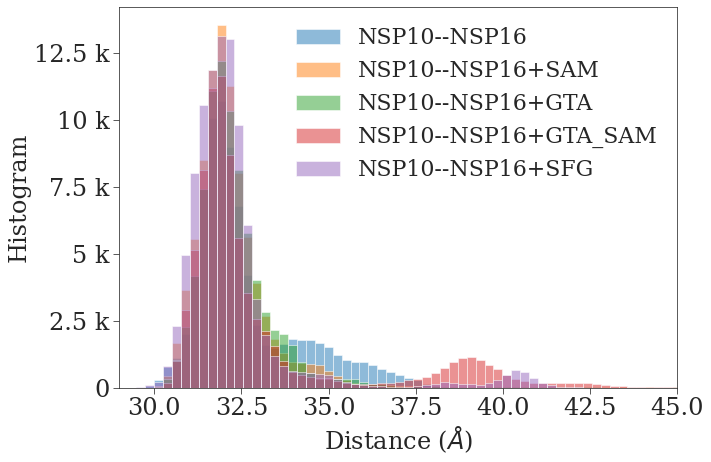

In [49]:
fig, ax = plt.subplots(figsize=(10,7))

bins=np.histogram(collect_dist(dist_df), bins=100)[1]
for i, row in dists.iterrows(): 
    _ = ax.hist(row['dist'], bins=bins, label=row['name'], alpha=.5, edgecolor='white') 
    
ax.set_ylabel("Histogram")
ax.set_xlabel(r"Distance ($\AA$)")
ax.legend()
ax.set_xlim([29, 45])
#     ax.set_title('')
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
fig.savefig(f"total_hist_bar.png", bbox_inches='tight')

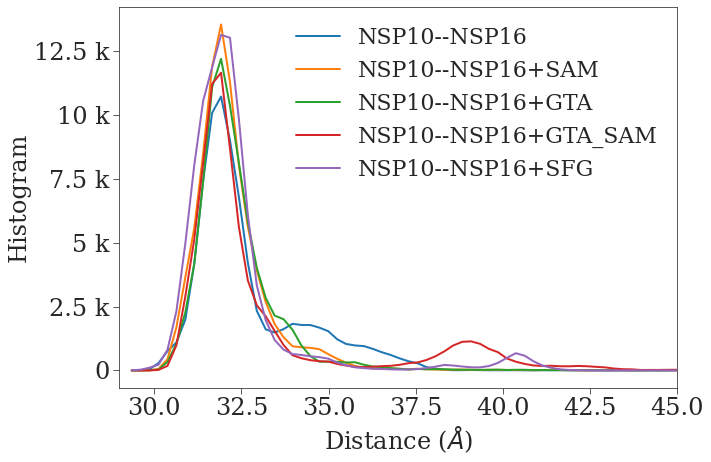

In [50]:
fig, ax = plt.subplots(figsize=(10,7))

bins=np.histogram(collect_dist(dist_df), bins=100)[1]
x = (bins[:-1] + bins[1:]) / 2 
for i, row in dists.iterrows(): 
    n, _ = np.histogram(row['dist'], bins=bins)
    ax.plot(x, n, label=row['name']) 
    
ax.set_ylabel("Histogram")
ax.set_xlabel(r"Distance ($\AA$)")
ax.legend()
ax.set_xlim([29, 45])
# ax.set_yscale('log')
#     ax.set_title('')
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
fig.savefig(f"total_hist_curve.png", bbox_inches='tight')

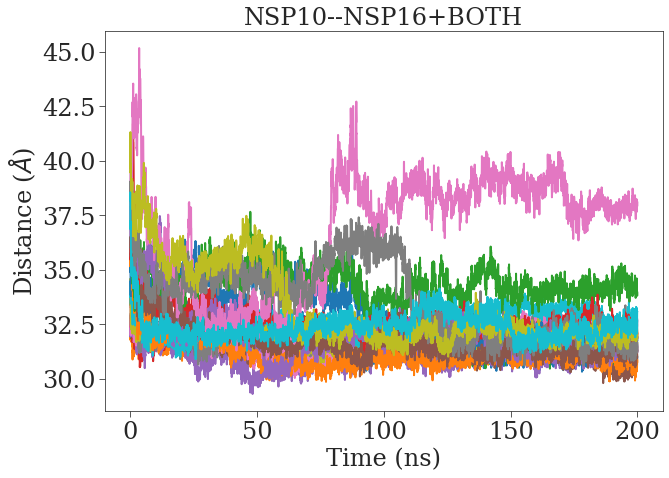

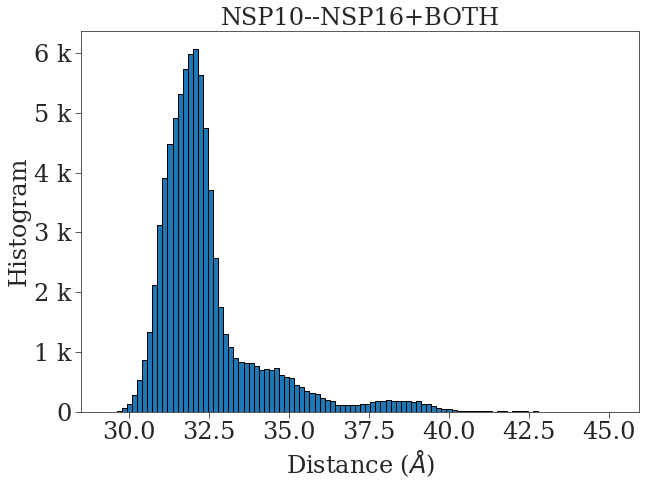

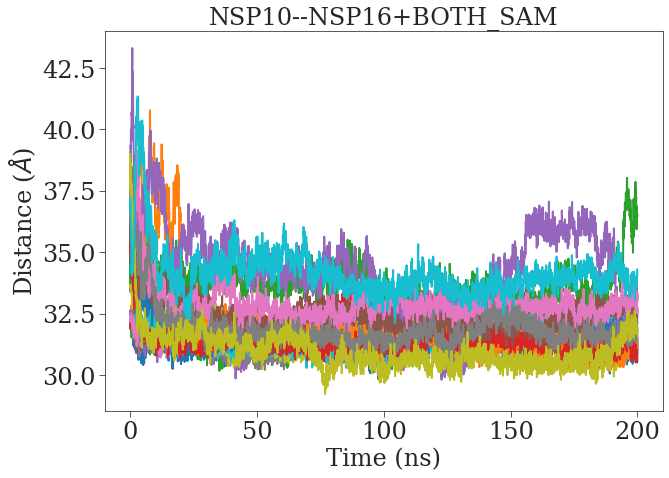

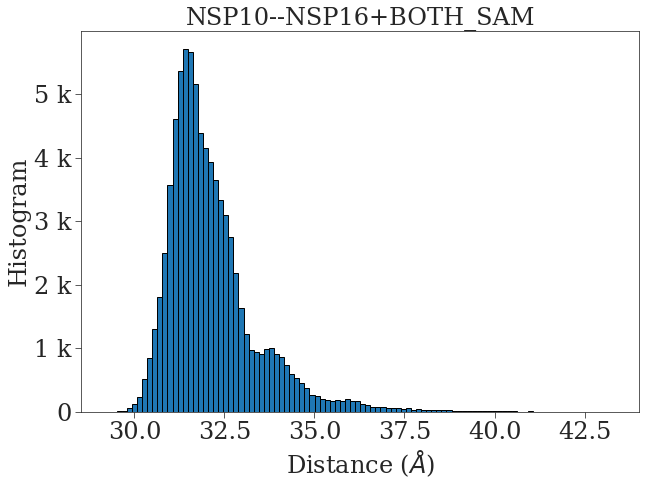

In [51]:
runs = glob.glob('../../nsp10_16_*')

for run in runs: 
    if not os.path.isdir(run): 
        continue 
    run_dir = run[4:]
    local_df = dist_df[dist_df['run'] == run_dir]
    if 'both' in run: 
        _df = local_df[~local_df['sys_name'].str.contains('sam')]
        sam_df = local_df[local_df['sys_name'].str.contains('sam')]
        sys_name = run_dir[2:].replace('_dist', '')
        sys_name = sys_name.replace("_16", "--NSP16").replace('16_', '16+').upper()
        plot_dist(_df, sys_name)
        plot_hist(_df, sys_name)
        sys_name = sys_name + '_SAM'
        plot_dist(sam_df, sys_name)
        plot_hist(sam_df, sys_name)
#     else: 
#         run_dir = run[4:]
#         local_df = dist_df[dist_df['run'] == run_dir]
#         if 'gta' in run: 
#             gta_df = local_df[~local_df['sys_name'].str.contains('samgta')]
#             samgta_df = local_df[local_df['sys_name'].str.contains('samgta')]
#             sys_name = run_dir[2:].replace('_dist', '')
#             sys_name = sys_name.replace("_16", "--NSP16").replace('16_', '16+').upper()
#             plot_dist(gta_df, sys_name)
#             plot_hist(gta_df, sys_name)
#             sys_name = sys_name + '_SAM'
#             plot_dist(samgta_df, sys_name)
#             plot_hist(samgta_df, sys_name)
#         else: 
#             sys_name = run_dir[2:].replace('_dist', '')
#             sys_name = sys_name.replace("_16", "--NSP16").replace('16_', '16+').upper()
#             plot_dist(local_df, sys_name)
#             plot_hist(local_df, sys_name)